<a href="https://colab.research.google.com/github/husnanzzry/Degree-Project/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

print(tf.__version__)

2.12.0


# Import data

In [ ]:
heart = pd.read_csv('heart_new.csv')

In [ ]:
heart.head(20)

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
heart.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.324503,0.685430,0.963576,131.678808,245.211921,0.149007,0.529801,149.612583,0.327815,1.037748,1.400662,0.731788,2.311258,0.543046
std,9.067887,0.465115,1.032044,17.541015,48.567877,0.356686,0.525849,22.935390,0.470196,1.162552,0.616818,1.023438,0.612011,0.498970
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Preprocess data**

In [ ]:
heart.isnull()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
heart.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
297    False
298    False
299    False
300    False
301    False
Length: 302, dtype: bool

In [ ]:
mappings=list()
encoder= LabelEncoder()
for column in range(len(heart.columns)):
  heart[heart.columns[column]]=encoder.fit_transform(heart[heart.columns[column]])
  mappings_dict={index:label for index, label in enumerate(encoder.classes_)}
  mappings.append(mappings_dict)

In [ ]:
mappings

[{0: 29,
  1: 34,
  2: 35,
  3: 37,
  4: 38,
  5: 39,
  6: 40,
  7: 41,
  8: 42,
  9: 43,
  10: 44,
  11: 45,
  12: 46,
  13: 47,
  14: 48,
  15: 49,
  16: 50,
  17: 51,
  18: 52,
  19: 53,
  20: 54,
  21: 55,
  22: 56,
  23: 57,
  24: 58,
  25: 59,
  26: 60,
  27: 61,
  28: 62,
  29: 63,
  30: 64,
  31: 65,
  32: 66,
  33: 67,
  34: 68,
  35: 69,
  36: 70,
  37: 71,
  38: 74,
  39: 76,
  40: 77},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 94,
  1: 100,
  2: 101,
  3: 102,
  4: 104,
  5: 105,
  6: 106,
  7: 108,
  8: 110,
  9: 112,
  10: 114,
  11: 115,
  12: 117,
  13: 118,
  14: 120,
  15: 122,
  16: 123,
  17: 124,
  18: 125,
  19: 126,
  20: 128,
  21: 129,
  22: 130,
  23: 132,
  24: 134,
  25: 135,
  26: 136,
  27: 138,
  28: 140,
  29: 142,
  30: 144,
  31: 145,
  32: 146,
  33: 148,
  34: 150,
  35: 152,
  36: 154,
  37: 155,
  38: 156,
  39: 160,
  40: 164,
  41: 165,
  42: 170,
  43: 172,
  44: 174,
  45: 178,
  46: 180,
  47: 192,
  48: 200},
 {0: 126,
  1: 131,
  2: 141

<Axes: xlabel='target', ylabel='count'>

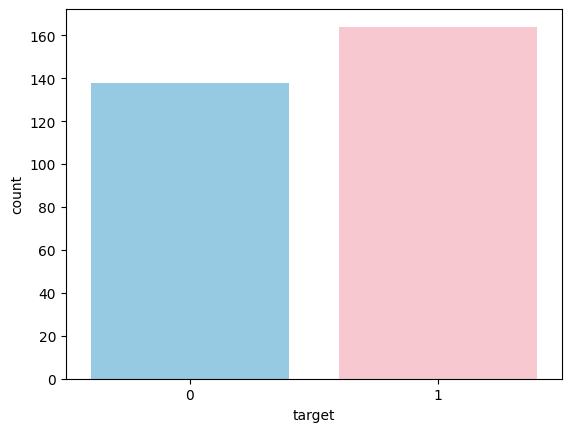

In [ ]:
#evaluate the target and find out if our data is imbalanced or not using histogram

colours=["#89cff0","#ffc0cb", "#003f5c"]
sns.countplot(data= heart, x="target",palette=colours)

<Axes: >

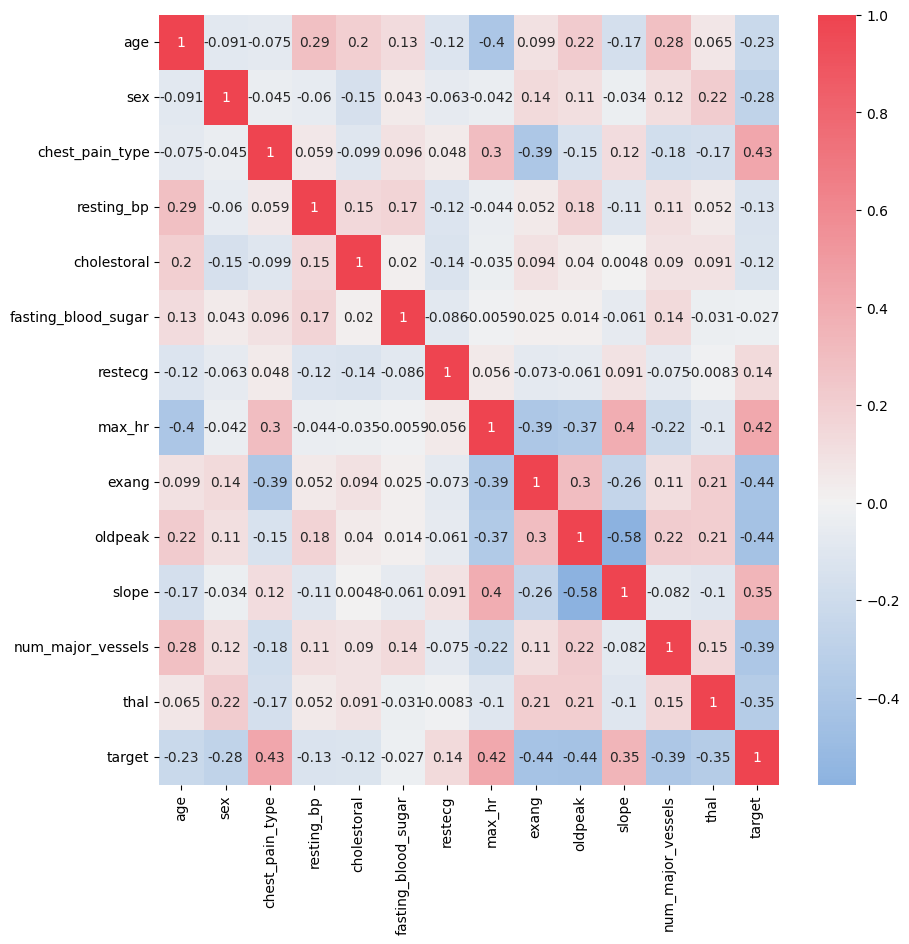

In [ ]:
#correlation matrix
corrmat= heart.corr()
plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

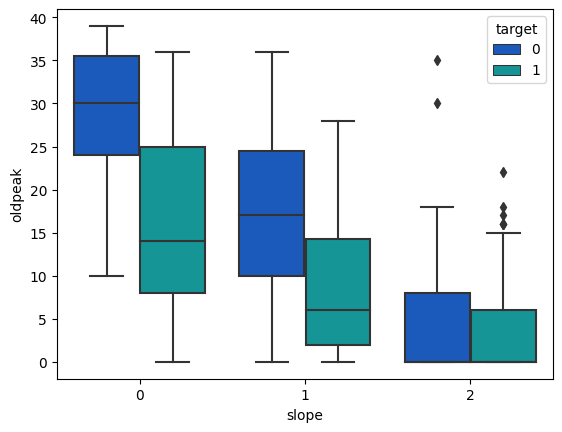

In [ ]:
sns.boxplot(data =heart,x="slope",y="oldpeak",palette='winter', hue="target")
plt.show()

In [ ]:
heart_input = heart[['age','sex','chest_pain_type', 'resting_bp', 'cholestoral' ,'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope','num_major_vessels' , 'thal']].copy()

In [ ]:
heart_output = heart[['target']].copy()

In [ ]:
heart_input.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,20.334437,0.685430,0.963576,21.900662,72.774834,0.149007,0.529801,49.122517,0.327815,9.798013,1.400662,0.731788,2.311258
std,8.923674,0.465115,1.032044,10.490150,38.296391,0.356686,0.525849,21.216529,0.470196,10.346919,0.616818,1.023438,0.612011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.250000,0.000000,0.000000,14.000000,42.000000,0.000000,0.000000,33.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,21.000000,1.000000,1.000000,22.000000,70.000000,0.000000,1.000000,51.500000,0.000000,8.000000,1.000000,0.000000,2.000000
75%,27.000000,1.000000,2.000000,28.000000,102.000000,0.000000,1.000000,65.000000,1.000000,16.000000,2.000000,1.000000,3.000000
max,40.000000,1.000000,3.000000,48.000000,150.000000,1.000000,2.000000,90.000000,1.000000,39.000000,2.000000,4.000000,3.000000


In [ ]:
heart_output.describe()

,target
count,302.000000
mean,0.543046
std,0.498970
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Explore Data

In [ ]:
x=heart_input
y=heart_output

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define data
data = asarray(x)
print(data)

# define min max scaler
scaler = MinMaxScaler()

# transform data
x_scaled = scaler.fit_transform(data)
print(x_scaled)

[[29  1  3 ...  0  0  1]
 [ 3  1  2 ...  0  0  2]
 [ 7  0  1 ...  2  0  2]
 ...
 [34  1  0 ...  1  2  3]
 [23  1  0 ...  1  1  3]
 [23  0  1 ...  1  1  2]]
[[0.725      1.         1.         ... 0.         0.         0.33333333]
 [0.075      1.         0.66666667 ... 0.         0.         0.66666667]
 [0.175      0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.85       1.         0.         ... 0.5        0.5        1.        ]
 [0.575      1.         0.         ... 0.5        0.25       1.        ]
 [0.575      0.         0.33333333 ... 0.5        0.25       0.66666667]]


In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define data
datay = asarray(y)
print(datay)

# define min max scaler
scaler = MinMaxScaler()

# transform data
y_scaled = scaler.fit_transform(datay)
print(y_scaled)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,train_size=0.8, random_state=42)

In [ ]:
x_train.shape

(241, 13)

In [ ]:
y_train.shape

(241, 1)

In [ ]:
y_train

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],

In [ ]:
x_test.shape

(61, 13)

In [ ]:
y_test.shape

(61, 1)

In [ ]:
y_test

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

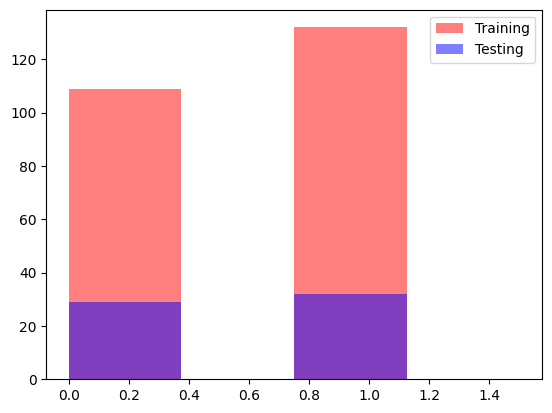

In [ ]:
bins=np.linspace(0,1.5,5)
plt.hist(y_train,bins,alpha=0.5,color='r',label='Training')
plt.hist(y_test,bins,alpha=0.5,color='b',label='Testing')
plt.legend()
plt.show()

# **BUILD MODEL**

### SAMPLE 1 WHERE OPTIMIZER = ADAM, BATCH SIZE = 32 AND EPOCHS = 20

**Set Up The Layers**

In [ ]:
model=Sequential()
model.add(Dense(50,input_dim=13,activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                700       
                                                                 
 dense_10 (Dense)            (None, 20)                1020      
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________
None


**Compile The Model**

In [ ]:
tf.keras.optimizers.Adamax(
    learning_rate=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adamax"
)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

**Train The Model**

In [ ]:
history = model.fit(x_train, y_train, verbose=1, epochs=500, batch_size=32, validation_data=(x_test, y_test))
print(history.history)

Epoch 1/500
8/8 [==============================] - 1s 19ms/step - loss: 1.1260 - accuracy: 0.4523 - val_loss: 1.0092 - val_accuracy: 0.4754
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 0.9968 - accuracy: 0.4523 - val_loss: 0.9059 - val_accuracy: 0.4754
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 0.8965 - accuracy: 0.4523 - val_loss: 0.8263 - val_accuracy: 0.4754
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 0.8215 - accuracy: 0.4523 - val_loss: 0.7733 - val_accuracy: 0.4754
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 0.7724 - accuracy: 0.4523 - val_loss: 0.7390 - val_accuracy: 0.4754
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 0.7393 - accuracy: 0.4523 - val_loss: 0.7187 - val_accuracy: 0.4754
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 0.7189 - accuracy: 0.4523 - val_loss: 0.7067 - val_accuracy: 0.4754
Epoch 8/500
8/8 [=========

In [ ]:
_, acc = model.evaluate(x_test,y_test, verbose=1, batch_size=32)
print("Accuracy = ", (acc*100.0), "%")

2/2 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.8525
Accuracy =  85.24590134620667 %


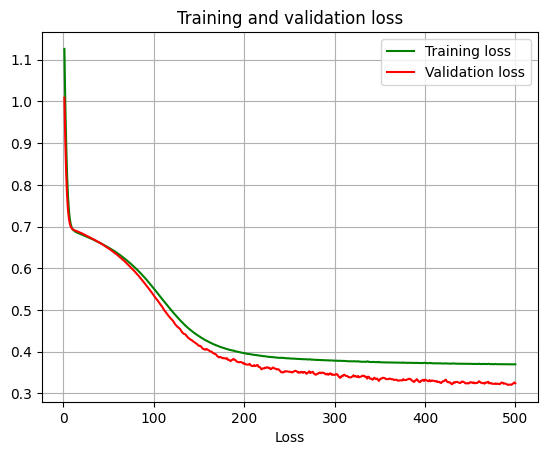

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.grid()
plt.show()

**Training and Validation Acuracy Graph**

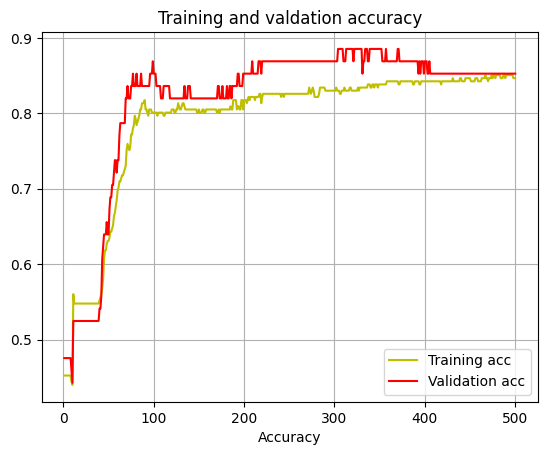

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and valdation accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### SAMPLE 2 WHERE OPTIMIZER = ADAM, BATCH SIZE = 1 AND EPOCHS = 15

**Set Up The Layers**

In [ ]:
model=Sequential()
model.add(Dense(50,input_dim=13,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                700       
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________
None


**Compile The Model**

In [ ]:
tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adam"
)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Train The Model**

In [ ]:
history = model.fit(x_train, y_train, verbose=1, epochs=300, batch_size=32, validation_data=(x_test, y_test))

print(history.history)

Epoch 1/300
8/8 [==============================] - 1s 19ms/step - loss: 0.7757 - accuracy: 0.4523 - val_loss: 0.7321 - val_accuracy: 0.4754
Epoch 2/300
8/8 [==============================] - 0s 5ms/step - loss: 0.7278 - accuracy: 0.4523 - val_loss: 0.7042 - val_accuracy: 0.4754
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 0.7024 - accuracy: 0.4689 - val_loss: 0.6886 - val_accuracy: 0.6393
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.6183 - val_loss: 0.6815 - val_accuracy: 0.5738
Epoch 5/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6793 - accuracy: 0.5602 - val_loss: 0.6766 - val_accuracy: 0.5246
Epoch 6/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5519 - val_loss: 0.6706 - val_accuracy: 0.5246
Epoch 7/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.5519 - val_loss: 0.6639 - val_accuracy: 0.5574
Epoch 8/300
8/8 [=========

In [ ]:
_, acc = model.evaluate(x_test,y_test, verbose=1, batch_size=32)
print("Accuracy = ", (acc*100.0), "%")

2/2 [==============================] - 0s 6ms/step - loss: 0.3184 - accuracy: 0.8525
Accuracy =  85.24590134620667 %


**Training and Validation loss Graph**

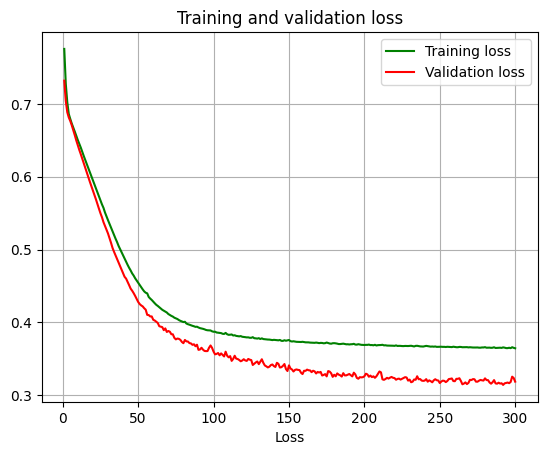

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.grid()
plt.show()

**Training and Validation Acuracy Graph**

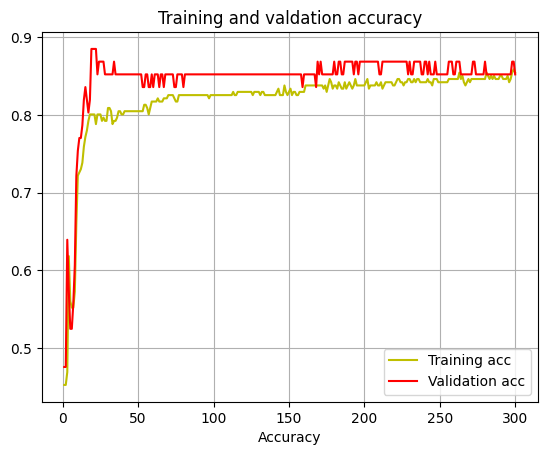

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and valdation accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### SAMPLE 3 WHERE OPTIMIZER = ADAM, BATCH SIZE = 1 AND EPOCHS = 15

**Set Up The Layers**

In [ ]:
model=Sequential()
model.add(Dense(50,input_dim=13,activation='tanh'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                700       
                                                                 
 dense_15 (Dense)            (None, 30)                1530      
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,871
Trainable params: 2,871
Non-trainable params: 0
_________________________________________________________________
None


**Compile The Model**

In [ ]:
from tensorflow.keras.optimizers.experimental import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

**Train The Model**

In [ ]:
history = model.fit(x_train, y_train, verbose=1, epochs=300, batch_size=32, validation_data=(x_test, y_test))

print(history.history)

Epoch 1/300
8/8 [==============================] - 1s 18ms/step - loss: 0.7009 - accuracy: 0.3859 - val_loss: 0.6966 - val_accuracy: 0.3934
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.4149 - val_loss: 0.6948 - val_accuracy: 0.5082
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5228 - val_loss: 0.6936 - val_accuracy: 0.5410
Epoch 4/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5353 - val_loss: 0.6928 - val_accuracy: 0.5246
Epoch 5/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5436 - val_loss: 0.6921 - val_accuracy: 0.5410
Epoch 6/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5477 - val_loss: 0.6917 - val_accuracy: 0.5410
Epoch 7/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5477 - val_loss: 0.6912 - val_accuracy: 0.5410
Epoch 8/300
8/8 [=========

In [ ]:
_, acc = model.evaluate(x_test,y_test, verbose=1, batch_size=32)
print("Accuracy = ", (acc*100.0), "%")

2/2 [==============================] - 0s 5ms/step - loss: 0.3538 - accuracy: 0.8361
Accuracy =  83.60655903816223 %


**Training and Validation Loss Graph**

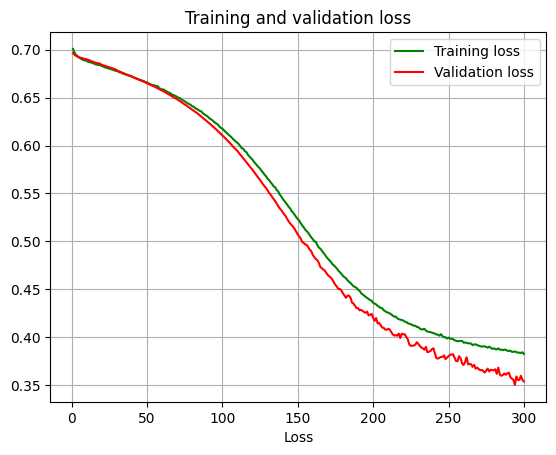

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.grid()
plt.show()

**Training and Validation Acuracy Graph**

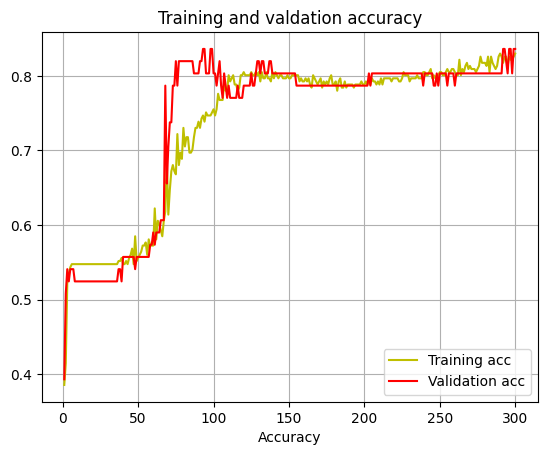

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and valdation accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# **Make Predictions**

In [ ]:
yp=model.predict(x_test)
yp[:5]

2/2 [==============================] - 0s 3ms/step


array([[0.0648902 ],
       [0.16985829],
       [0.89933944],
       [0.10083076],
       [0.8958181 ]], dtype=float32)

In [ ]:
y_test[:20]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [ ]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:20]

[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]

# **Verify Predictions**

**Evaluation metric**

In [ ]:
accuracy_score=tf.keras.metrics.Accuracy()
accuracy = accuracy_score(y_test, y_pred)

recall_score = tf.keras.metrics.Recall()
recall = recall_score(y_test, y_pred)

precision_score = tf.keras.metrics.Precision()
precision = precision_score(y_test, y_pred)

f1_score= 2 * (precision.numpy() * recall.numpy()) / (precision.numpy() + recall.numpy())

print("********* Random Forest Results *********")
print("Precision   : ", round(precision.numpy(),2))
print("Recall      : ", round(recall.numpy(),2))
print("F1 Score    : ", round(f1_score,2))

********* Random Forest Results *********
Precision   :  0.89
Recall      :  0.78
F1 Score    :  0.83


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average="macro")
precision_weighted = precision_score(y_test, y_pred, average="weighted")
recall_macro = recall_score(y_test, y_pred, average="macro")
recall_weighted = recall_score(y_test, y_pred, average="weighted")
f1_score_macro = f1_score(y_test, y_pred, average="macro")
f1_score_weighted = f1_score(y_test, y_pred, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", round(accuracy,2))
print("Macro Averaged Precision : ", round(precision_macro,2))
print("Weighted Averaged Precision: ", round(precision_weighted,2))
print("Macro Averaged Recall : ", round(recall_macro,2))
print("Weighted Averaged Recall : ", round(recall_weighted,2))
print("Macro Averaged F1 Score : ", round(f1_score_macro,2))
print("Weighted Averaged F1 Score : ", round(f1_score_weighted,2))

********* Random Forest Results *********
Accuracy    :  0.84
Macro Averaged Precision :  0.84
Weighted Averaged Precision:  0.84
Macro Averaged Recall :  0.84
Weighted Averaged Recall :  0.84
Macro Averaged F1 Score :  0.84
Weighted Averaged F1 Score :  0.84


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        29
         1.0       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



**Confusion matrix**

Text(95.72222222222221, 0.5, 'Truth')

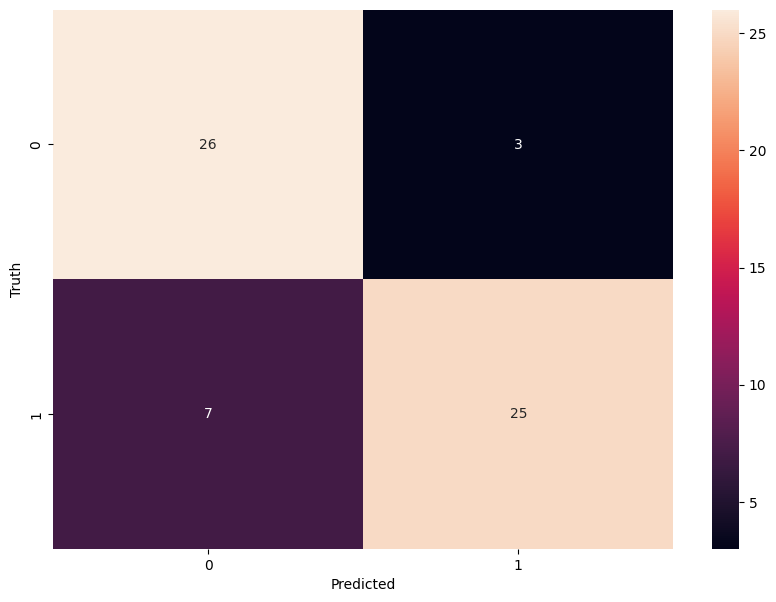

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Use The Trained Model**

In [ ]:
heart.loc[(heart['exang']==0)&(heart['oldpeak']==0)&(heart['slope']==0)&(heart['num_major_vessels']==0)]

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
159,22,1,1,14,70,0,1,68,0,0,0,0,2,1
